In [194]:
import matplotlib.pyplot as plt
#from google.colab import files

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""


import numpy as np
from numpy import cos, sin

label_size = 20

from numpy import sqrt

import time
from numba import jit
from numpy import sin, cos

T0=time.time()

import time

from numpy import array, zeros

# Cumulant Approximation at second order for Multilevel Spin systems

## Hamiltonian Spin-Spin interactions

We consider hamiltonians of the form $H=\sum_{ab}h_{ab}\hat{S}_{ab}+\sum_{abcd}h_{abcd}\hat{S}_{abcd}$, with $\hat{S}_{ab}=\sum_i\left|a\right>\!\!\left<b\right|_i$ and $\hat{S}_{abcd}=\hat{S}_{ab}\hat{S}_{cd}$. We define as well $S_{abcdef}\equiv\left<\hat{S}_{ab}\hat{S}_{cd}\hat{S}_{ef}  \right>$, $S_{abcd}\equiv\left<\hat{S}_{ab}\hat{S}_{cd}  \right>$ and $S_{ab}\equiv\left<\hat{S}_{ab}  \right>$. The cumulant approximation at second order can be written as:

$$S_{abcdef}\approx S_{abcd}S_{ef}+S_{cdef}S_{ab}+S_{abef}S_{cd}-2S_{ab}S_{cd}S_{ef}$$

This implies as well that we will have in total $\rm{dim}(H_i)^2+\rm{dim}(H_i)$ elements to be considered in the hamiltonian (redundant terms). Our objective at first is to find a symbolic form to write this elements and find a suitable factorization of the system of differential equations. We calculated the following terms:



\begin{align}
\left[\hat{S}_{ab},\hat{S}_{ef}\right] & =\delta_{eb}\hat{S}_{af}-\delta_{af}\hat{S}_{eb},\\
\left[\hat{S}_{ab}\hat{S}_{cd},\hat{S}_{ef}\right] & =\delta_{ed}\hat{S}_{ab}\hat{S}_{cf}-\delta_{cf}\hat{S}_{ab}\hat{S}_{ed}+\delta_{eb}\hat{S}_{af}\hat{S}_{cd}-\delta_{af}\hat{S}_{eb}\hat{S}_{cd},\\
\left[\hat{S}_{ab}\hat{S}_{cd},\hat{S}_{ef}\hat{S}_{gh}\right] & =\delta_{dg}\hat{S}_{ab}\hat{S}_{ef}\hat{S}_{ch}-\delta_{ch}\hat{S}_{ab}\hat{S}_{ef}\hat{S}_{gd}+\delta_{ed}\hat{S}_{ab}\hat{S}_{cf}\hat{S}_{gh}-\delta_{cf}\hat{S}_{ab}\hat{S}_{ed}\hat{S}_{gh}\\
 & \,\,\,\,\,+\delta_{gb}\hat{S}_{ef}\hat{S}_{ah}\hat{S}_{cd}-\delta_{ah}\hat{S}_{ef}\hat{S}_{gb}\hat{S}_{cd}+\delta_{eb}\hat{S}_{af}\hat{S}_{gh}\hat{S}_{cd}-\delta_{af}\hat{S}_{eb}\hat{S}_{gh}\hat{S}_{cd}.
\end{align}

In general, observe that there is a bijection between $ab$ and $\{0,1,\dots,\rm{dim}(H_i)-1\}$ and between $abcd$ and $\{\rm{dim}(H_i),1,\dots,\rm{dim}(H_i)^2+\rm{dim}(H_i)-1\}$, so we will consider at first the array of hamiltonian elements to be zero, such that the user will set each of the coefficients following the notation (in the case of 4-level system) $\{h_{00},h_{01},\dots,h_{33},h_{00,00},h_{00,01},\dots,h_{33,33} \}$. From the equations we can observe that only the term $\left[\hat{S}_{ab}\hat{S}_{cd},\hat{S}_{ef}\hat{S}_{gh}\right]$ requires an approximation. Our approach relies on the fact that the processes studied are collective, so following this we will obtain expressions for the quantum decay through channels of the form $\hat{S}_{ab}$, performing some algebra lead us to:

\begin{align*}
\mathcal{L}_{\hat{S}_{ab}}^{*}\left[\hat{S}_{cd}\right] & =\frac{\Gamma_{ab}}{2}\left(\delta_{ad}\hat{S}_{bacb}-\delta_{cb}\hat{S}_{baad}-\delta_{bd}\hat{S}_{caab}+\delta_{ca}\hat{S}_{bdab}\right)\\
\mathcal{L}_{\hat{S}_{ab}}^{*}\left[\hat{S}_{cdef}\right] & =\frac{\Gamma_{ab}}{2}\left(\delta_{af}\hat{S}_{bacdeb}-\delta_{eb}\hat{S}_{bacdaf}+\delta_{ad}\hat{S}_{bacbef}-\delta_{cb}\hat{S}_{baadef}-\delta_{bf}\hat{S}_{cdeaab}+\delta_{ea}\hat{S}_{cdbfab}-\delta_{bd}\hat{S}_{caefab}+\delta_{ca}\hat{S}_{bdefab}\right)
\end{align*}

In [195]:


Lev   = 4
Lev_c = Lev**2


#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Nat=10000

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


# Further notation, we will separate using an array compound by 4 index which represent each of the parts of the hamiltonian,
# in the case of the single terms, the last two indexes will be "None". In the case of the full representation, a hamiltonian
# woudl be just a dictionary where the first element would be the index and the second one the coefficient. Take account that
#constants coefficients are expected.


def H_index1(a,b):
    
    return Lev*a+b


def H_index2(a,b,c,d):
    
    return Lev_c+Lev_c*(Lev*a+b)+(Lev*c+d)



def cumul(a,b,c,d,e,f, Ur):
     
    ind_ab=H_index1(a,b)
    ind_cd=H_index1(c,d)
    ind_ef=H_index1(e,f)


    T1=Ur[H_index2(a,b,c,d)]*Ur[ind_ef]
    T2=Ur[H_index2(a,b,e,f)]*Ur[ind_cd]
    T3=Ur[H_index2(c,d,e,f)]*Ur[ind_ab]
    T4=Ur[ind_ab]*Ur[ind_cd]*Ur[ind_ef]
    
    return T1+T2+T3-2*T4


def krone(a,b):
    if a==b:
        return 1
    else:
        return 0
    
@jit
def expand2(a,b,c,d,Ur):
    
    Result=0
    
    if krone(c,b)==1:
        Result=Result+Ur[H_index1(a,d)]
    
    if krone(a,d)==1:
        Result=Result-Ur[H_index1(c,b)]
    
    return Result
    
    
    
@jit    
def expand3A(a,b,c,d,e,f,Ur):      # For single
    
    Result=0 
    
    if krone(e,d)==1:
        Result=Result+Ur[H_index2(a,b,c,f)]        

    if krone(c,f)==1:
        Result=Result-Ur[H_index2(a,b,e,d)]  
        
    if krone(e,b)==1:
        Result=Result+Ur[H_index2(a,f,c,d)]        

    if krone(a,f)==1:
        Result=Result-Ur[H_index2(e,b,c,d)]
        
    return Result    
        
    
@jit    
def expand3B(a,b,c,d,e,f,Ur):      #For double

    Result=0 
    
    if krone(e,b)==1:
        Result=Result+Ur[H_index2(c,d,a,f)]        

    if krone(a,f)==1:
        Result=Result-Ur[H_index2(c,d,e,b)]  
        
    if krone(c,b)==1:
        Result=Result+Ur[H_index2(a,d,e,f)]        

    if krone(a,d)==1:
        Result=Result-Ur[H_index2(c,b,e,f)]
        
    return Result   
    
    
@jit    
def expand4(a,b,c,d,e,f,g,h,Ur):
    
    Result=0
    
    if krone(d,g)==1:
        Result=Result+cumul(a,b,e,f,c,h,Ur)
    
    if krone(c,h)==1:
        Result=Result-cumul(a,b,e,f,g,d,Ur)

    if krone(e,d)==1:
        Result=Result+cumul(a,b,c,f,g,h,Ur)        

    if krone(c,f)==1:
        Result=Result-cumul(a,b,e,d,g,h,Ur)  
        
    if krone(g,b)==1:
        Result=Result+cumul(e,f,a,h,c,d,Ur)
    
    if krone(a,h)==1:
        Result=Result-cumul(e,f,g,b,c,d,Ur)

    if krone(e,b)==1:
        Result=Result+cumul(a,f,g,h,c,d,Ur)        

    if krone(a,f)==1:
        Result=Result-cumul(e,b,g,h,c,d,Ur) 
        
    return Result
    
H_elem=Lev**2+Lev**4




In [196]:
Hamiltonian_Coeficients=np.zeros((1,H_elem))

# The array summarizes the coeffients of the form $\{h_{00},h_{01},\dots,h_{33},h_{00,00},h_{00,01},\dots,h_{33,33} \}$

We considered an array of the form $\{h_{00},h_{01},\dots,h_{33},h_{00,00},h_{00,01},\dots,h_{33,33} \}$, so the user will be able to edit the content of the array depending of the hamiltonian to be simulated.

In [197]:
Hamiltonian_Coeficients ;

In [198]:
Delta_det=   20 * np.sqrt(Nat) 
chi      =   1/( Delta_det )
delta_A  =   Nat/(2*Delta_det)
delta_B  =  -Nat/(2*Delta_det)

In [199]:
#Hamiltonian_Coeficients[0][H_index2(0,0,0,0)]= chi
#Hamiltonian_Coeficients[0][H_index2(0,0,1,1)]=-chi
#Hamiltonian_Coeficients[0][H_index2(1,1,0,0)]=-chi
#Hamiltonian_Coeficients[0][H_index2(1,1,1,1)]= chi

In [200]:
def Hamiltonian_Coeficients(t,delta_A=delta_A,delta_B=delta_B,chi=chi):
  
    Hamiltonian_Coeficients=np.zeros((1,H_elem))
    Hamiltonian_Coeficients[0][H_index2(2,0,0,2)]= chi
    Hamiltonian_Coeficients[0][H_index2(2,0,1,3)]=-chi
    Hamiltonian_Coeficients[0][H_index2(3,1,0,2)]=-chi
    Hamiltonian_Coeficients[0][H_index2(3,1,1,3)]= chi


    Hamiltonian_Coeficients[0][H_index1(0,0)]    =  delta_A/2#*np.cos(Nat*chi*t)
    Hamiltonian_Coeficients[0][H_index1(2,2)]    = -delta_A/2#*np.sin(Nat*chi*t)

    Hamiltonian_Coeficients[0][H_index1(1,1)]    =  delta_B/2
    Hamiltonian_Coeficients[0][H_index1(3,3)]    = -delta_B/2

    return Hamiltonian_Coeficients



In [201]:
Decay_Coeficients=np.zeros((1,Lev**2))   #np.random.rand((1,Lev))

# The array summarizes the decaying coefficients

In [202]:
#Dec_Co=np.random.rand(Lev)



In [204]:
def Decay_dyn1( a, b ,c ,d ,Ur):   #ab refers to the decay channel and cd refers to the 1-pair operator
    
    Decay_rate_ab=Decay_Coeficients[0][H_index1(a,b)]
    
    
    if Decay_rate_ab<=10**(-13):
        return 0
    
    else:
        
        Dec_elt=0
            
        if krone(a,d)==1:
                
            Dec_elt=Dec_elt+Ur[H_index2(b,a,c,d)]
                
        if krone(c,b)==1:
                
            Dec_elt=Dec_elt-Ur[H_index2(b,a,a,d)]
                
        if krone(b,d)==1:
                
            Dec_elt=Dec_elt-Ur[H_index2(c,a,a,b)]
                
        if krone(c,a)==1:
                
            Dec_elt=Dec_elt+Ur[H_index2(b,d,a,b)]
                
        return 0.5*Decay_rate_ab*Dec_elt

In [210]:
def Decay_dyn2( a, b ,c ,d,e,f ,Ur):   #ab refers to the decay channel and cdef refers to the 2-pair operator
    
    Decay_rate_ab=Decay_Coeficients[0][H_index1(a,b)]
    
    
    if Decay_rate_ab<=10**(-10):
        
        return 0
    
    else:
        
        Dec_elt=0
            
        if krone(a,f)==1:
                
            Dec_elt=Dec_elt+cumul(b,a,c,d,e,b,  Ur)
                
        if krone(e,b)==1:
                
            Dec_elt=Dec_elt-cumul(b,a,c,d,a,f,  Ur)
                
        if krone(a,d)==1:
                
            Dec_elt=Dec_el+cumul(b,a,c,b,e,f,  Ur)
                
        if krone(c,b)==1:
                
            Dec_elt=Dec_elt-cumul(b,a,a,d,e,f,  Ur)
                
                
                
                
        if krone(b,f)==1:
                
            Dec_elt=Dec_elt-cumul(c,d,e,a,a,b,  Ur)
                
        if krone(e,a)==1:
                
            Dec_elt=Dec_elt+cumul(c,d,b,f,a,b,  Ur)
                
        if krone(b,d)==1:
                
            Dec_elt=Dec_elt-cumul(c,a,e,f,a,b,  Ur)
                
        if krone(c,a)==1:
                
            Dec_elt=Dec_elt+ cumul(b,d,e,f,a,b,  Ur)               
                
        return 0.5*Decay_rate_ab*Dec_elt

In [212]:

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


def function_ed_cumul(y_ar, t,delta_A=delta_A,delta_B=delta_B):            #(y_ar, t, H_coef,Lev=Lev,H_elem=H_elem):
    
    H_coef=Hamiltonian_Coeficients(t,delta_A,delta_B)[0]
    
    dzdt=(zeros((1,H_elem),dtype='complex'))[0]

    
    for e in range(Lev):
        for f in range(Lev):
            
            Ind_ef=H_index1(e,f)
            
            for a in range(Lev):
                for b in range(Lev):
                    
                    Ind_ab=H_index1(a,b)
                    dzdt[Ind_ef]+=1j * H_coef[Ind_ab]*expand2(a,b,e,f,y_ar)+Decay_dyn1(a,b,e,f,y_ar)
                    
                    
                    for c in range(Lev):
                        for d in range(Lev):
                            
                            Ind_abcd=H_index2(a,b,c,d)
                            dzdt[Ind_ef]+=1j* H_coef[Ind_abcd]*expand3A(a,b,c,d,e,f,y_ar)
                            
                           
    for e in range(Lev):
        for f in range(Lev):
            for g in range(Lev):
                for h in range(Lev):
                    
                    Ind_efgh=H_index2(e,f,g,h)
                    
                    for a in range(Lev):
                        for b in range(Lev):
                            
                            Ind_ab=H_index1(a,b)
                            dzdt[Ind_efgh]+=1j* H_coef[Ind_ab]*expand3B(a,b,e,f,g,h,y_ar)+Decay_dyn2(a,b,e,f,g,h,y_ar)
                            
                            for c in range(Lev):
                                for d in range(Lev):
                                    
                                    Ind_abcd=H_index2(a,b,c,d)
                                    dzdt[Ind_efgh]+=1j* H_coef[Ind_abcd]*expand4(a,b,c,d,e,f,g,h,y_ar) 
                 
                                    
    return np.array(dzdt)
                                      

In [213]:
ye=np.linspace(0,Lev**2+Lev**4,Lev**2+Lev**4+1)


ye;


Assuming identically prepared spins such that the initial state can be written as $\rho\left(0\right)=\otimes_{i}\rho_{i}$ and in our case of interest $\rho_{i}=\frac{1}{2}\left(\left|0\right\rangle \left\langle 0\right|_{i}+\left|3\right\rangle \left\langle 3\right|_{i}\right)$

In [214]:
rho_init=np.zeros((Lev,Lev),dtype="complex")


#Set initial state

rho_init[0,0]=0.5
rho_init[0,1]=0
rho_init[1,0]=0
rho_init[3,3]=0.5

In [215]:
rho_init;

In [216]:
from numpy import trace


def Matr_ab(a,b,Lev=Lev):
    
    Mat_ab=np.zeros((Lev,Lev))
    Mat_ab[a][b]=1
    
    return Mat_ab



In [217]:

def Single_Value_init(Lev=Lev,rho_init=rho_init):
    
    List_init=[]
    
    for i in range(Lev):
        for j in range(Lev):
            List_init.append(trace(Matr_ab(i,j)@rho_init))
            
    return List_init  

def Total_list_init(Lev=Lev,rho_init=rho_init,Nat=Nat):
    
    List_sin=Single_Value_init(Lev,rho_init)
    
    List_tot_fin=list(np.zeros((1,Lev**2+Lev**4))[0])
    
    for a in range(Lev):
        for b in range(Lev):
            
            H1ab=H_index1(a,b)
            List_tot_fin[H1ab]=Nat*List_sin[H1ab]
            
            for c in range(Lev):
                for d in range(Lev):
                    
                    H1ad=H_index1(a,d)
                    H1ab=H_index1(a,b)
                    H1cd=H_index1(c,d)
                    H2abcd=H_index2(a,b,c,d)
                    
                    List_tot_fin[H2abcd]=krone(b,c)*Nat*List_sin[H1ad]+Nat*(Nat-1)*List_sin[H1ab]*List_sin[H1cd]
                    
        
    return List_tot_fin
                    

In [218]:
Total_list_init();

In [219]:
from scipy.integrate import ode

y0, t0 = Total_list_init(), 0
 

In [220]:
tspan=np.linspace(0,1.2,80)

In [221]:

def HeunSolver(y0=y0, tspan=tspan,delta_A=delta_A,delta_B=delta_B):
    
    Ns = len(tspan)
    h = (tspan[Ns-1] - tspan[0])/(Ns - 1)
    # allocate space for result
    y = np.zeros((Ns, Lev**2+Lev**4), dtype='complex')

    y[0] = y0;
    for n in range(0, Ns-1):


        tn = tspan[n]
        tnp1 = tspan[n+1]
        yn = y[n]
        


        fn = function_ed_cumul(yn, tn,delta_A,delta_B)
        ybar = yn + fn*h  
        fnbar = function_ed_cumul(ybar, tnp1,delta_A,delta_B)
        y[n+1] = yn + 0.5*(fn + fnbar)*h

        print((n+1)*100/Ns,"% finished")
        
        
    return y


In [222]:
ResultHS=HeunSolver(y0, tspan,delta_A,delta_B)

<ipython-input-195-8b040db70a79>:50: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "expand2" failed type inference due to: Untyped global name 'krone': cannot determine Numba type of <class 'function'>

File "<ipython-input-195-8b040db70a79>", line 55:
def expand2(a,b,c,d,Ur):
    <source elided>
    
    if krone(c,b)==1:
    ^

  @jit
C:\Users\camil\anaconda3\lib\site-packages\numba\core\object_mode_passes.py:177: NumbaWarning: Function "expand2" was compiled in object mode without forceobj=True.

File "<ipython-input-195-8b040db70a79>", line 51:
@jit
def expand2(a,b,c,d,Ur):
^

  warnings.warn(errors.NumbaWarning(warn_msg,
C:\Users\camil\anaconda3\lib\site-packages\numba\core\object_mode_passes.py:187: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been detected, this is deprecated behaviour.

For more information visit http://numba.pydata.org/numba-doc/latest/refere

1.25 % finished
2.5 % finished
3.75 % finished
5.0 % finished
6.25 % finished
7.5 % finished
8.75 % finished
10.0 % finished
11.25 % finished
12.5 % finished
13.75 % finished
15.0 % finished
16.25 % finished
17.5 % finished
18.75 % finished
20.0 % finished
21.25 % finished
22.5 % finished
23.75 % finished
25.0 % finished
26.25 % finished
27.5 % finished
28.75 % finished
30.0 % finished
31.25 % finished
32.5 % finished
33.75 % finished
35.0 % finished
36.25 % finished
37.5 % finished
38.75 % finished
40.0 % finished
41.25 % finished
42.5 % finished
43.75 % finished
45.0 % finished
46.25 % finished
47.5 % finished
48.75 % finished
50.0 % finished
51.25 % finished
52.5 % finished
53.75 % finished
55.0 % finished
56.25 % finished
57.5 % finished
58.75 % finished
60.0 % finished
61.25 % finished
62.5 % finished
63.75 % finished
65.0 % finished
66.25 % finished
67.5 % finished
68.75 % finished
70.0 % finished
71.25 % finished
72.5 % finished
73.75 % finished
75.0 % finished
76.25 % finished


In [223]:



def Minimum_squeezing(delta_A,delta_B):
    ResultHS=HeunSolver(y0, tspan,delta_A,delta_B)



    E_X    =(ResultHS[:,H_index1(0,2)]+ResultHS[:,H_index1(2,0)])/2
    E_Y    =(ResultHS[:,H_index1(1,3)]-ResultHS[:,H_index1(3,1)])/(2j)


    V1=(ResultHS[:,H_index2(0,2,0,2)]+ResultHS[:,H_index2(0,2,2,0)]+ResultHS[:,H_index2(2,0,0,2)]+ResultHS[:,H_index2(2,0,2,0)])/(4)
    V2=(ResultHS[:,H_index2(0,2,1,3)]-ResultHS[:,H_index2(0,2,3,1)]+ResultHS[:,H_index2(2,0,1,3)]-ResultHS[:,H_index2(2,0,3,1)])/(-4j)
    V3=(ResultHS[:,H_index2(1,3,0,2)]+ResultHS[:,H_index2(1,3,2,0)]-ResultHS[:,H_index2(3,1,0,2)]-ResultHS[:,H_index2(3,1,2,0)])/(-4j)
    V4=(ResultHS[:,H_index2(1,3,1,3)]-ResultHS[:,H_index2(1,3,3,1)]-ResultHS[:,H_index2(3,1,1,3)]+ResultHS[:,H_index2(3,1,3,1)])/(-4)

    Sq1=V1+V2+V3+V4
    Sq2=V1-V2-V3+V4

    if np.min(Sq1)<=np.min(Sq2):

      
        index_min = np.argmin(Sq1)
        x = Nat*chi*tspan[index_min]
        y = np.real(np.min(Sq1))
        return [delta_A, delta_B ,x ,y/(Nat/4)]

    else:

        index_min = np.argmin(Sq2)
        x = Nat*chi*tspan[index_min]
        y = np.real(np.min(Sq2))
        return [delta_A, delta_B ,x ,y/(Nat/4)]   #Squeezing factor normalized


    





In [224]:
Time_scale=Nat*chi/2



In [225]:
Results_RS=[]

for j in range(2):

    print("ITERATION NUMBER ",j)

    delA=np.random.uniform(0            , 2*Time_scale ,1 )[0]
    delB=np.random.uniform(-2*Time_scale, 0            ,1 )[0]

    

    Results_RS.append(Minimum_squeezing(delA,delB))
    


ITERATION NUMBER  0
1.25 % finished
2.5 % finished
3.75 % finished
5.0 % finished
6.25 % finished
7.5 % finished
8.75 % finished
10.0 % finished
11.25 % finished
12.5 % finished
13.75 % finished
15.0 % finished
16.25 % finished
17.5 % finished
18.75 % finished
20.0 % finished
21.25 % finished
22.5 % finished
23.75 % finished
25.0 % finished
26.25 % finished
27.5 % finished
28.75 % finished
30.0 % finished
31.25 % finished
32.5 % finished
33.75 % finished
35.0 % finished
36.25 % finished
37.5 % finished
38.75 % finished
40.0 % finished
41.25 % finished
42.5 % finished
43.75 % finished
45.0 % finished
46.25 % finished
47.5 % finished
48.75 % finished
50.0 % finished
51.25 % finished
52.5 % finished
53.75 % finished
55.0 % finished
56.25 % finished
57.5 % finished
58.75 % finished
60.0 % finished
61.25 % finished
62.5 % finished
63.75 % finished
65.0 % finished
66.25 % finished
67.5 % finished
68.75 % finished
70.0 % finished
71.25 % finished
72.5 % finished
73.75 % finished
75.0 % finish

In [226]:
Results_RS

[[0.009391696068694055,
  -0.062169911899663255,
  0.9873417721518987,
  0.49664378144928595],
 [0.3329873095806962,
  -1.0250818227077927,
  1.2151898734177216,
  0.42147518792395533]]

## Visualization of results

In [227]:
tspan=np.linspace(0,1.2,80)

Nat*chi*tspan[-1]   # N*chi*t

6.0

In [228]:

ResultHS=HeunSolver(y0, tspan,delta_A,delta_B)



1.25 % finished
2.5 % finished
3.75 % finished
5.0 % finished
6.25 % finished
7.5 % finished
8.75 % finished
10.0 % finished
11.25 % finished
12.5 % finished
13.75 % finished
15.0 % finished
16.25 % finished
17.5 % finished
18.75 % finished
20.0 % finished
21.25 % finished
22.5 % finished
23.75 % finished
25.0 % finished
26.25 % finished
27.5 % finished
28.75 % finished
30.0 % finished
31.25 % finished
32.5 % finished
33.75 % finished
35.0 % finished
36.25 % finished
37.5 % finished
38.75 % finished
40.0 % finished
41.25 % finished
42.5 % finished
43.75 % finished
45.0 % finished
46.25 % finished
47.5 % finished
48.75 % finished
50.0 % finished
51.25 % finished
52.5 % finished
53.75 % finished
55.0 % finished
56.25 % finished
57.5 % finished
58.75 % finished
60.0 % finished
61.25 % finished
62.5 % finished
63.75 % finished
65.0 % finished
66.25 % finished
67.5 % finished
68.75 % finished
70.0 % finished
71.25 % finished
72.5 % finished
73.75 % finished
75.0 % finished
76.25 % finished


In [229]:
E_X    =(ResultHS[:,H_index1(0,2)]+ResultHS[:,H_index1(2,0)])/2
E_Y    =(ResultHS[:,H_index1(1,3)]-ResultHS[:,H_index1(3,1)])/(2j)


V1=(ResultHS[:,H_index2(0,2,0,2)]+ResultHS[:,H_index2(0,2,2,0)]+ResultHS[:,H_index2(2,0,0,2)]+ResultHS[:,H_index2(2,0,2,0)])/(4)
V2=(ResultHS[:,H_index2(0,2,1,3)]-ResultHS[:,H_index2(0,2,3,1)]+ResultHS[:,H_index2(2,0,1,3)]-ResultHS[:,H_index2(2,0,3,1)])/(-4j)
V3=(ResultHS[:,H_index2(1,3,0,2)]+ResultHS[:,H_index2(1,3,2,0)]-ResultHS[:,H_index2(3,1,0,2)]-ResultHS[:,H_index2(3,1,2,0)])/(-4j)
V4=(ResultHS[:,H_index2(1,3,1,3)]-ResultHS[:,H_index2(1,3,3,1)]-ResultHS[:,H_index2(3,1,1,3)]+ResultHS[:,H_index2(3,1,3,1)])/(-4)


In [230]:

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)



C:\Users\camil\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\camil\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


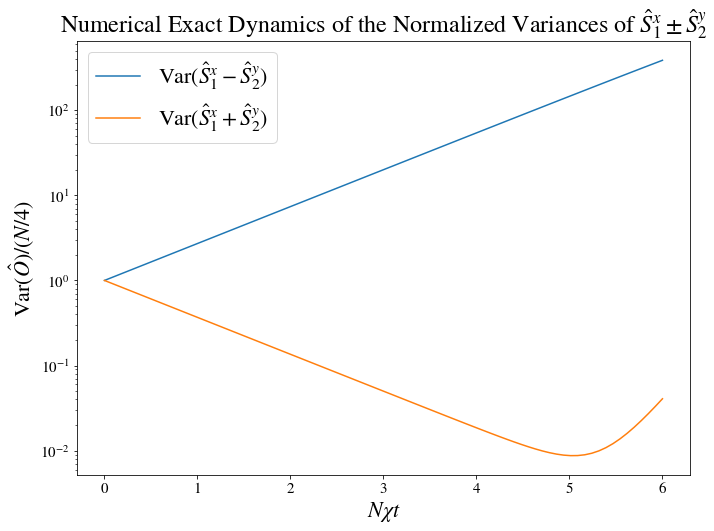

In [231]:
fontsize=22

plt.title("Numerical Exact Dynamics of the Normalized Variances of $\hat{S}_1^x\pm \hat{S}_2^y$",fontsize=24)

plt.plot(Nat*tspan*chi, (V1+V2+V3+V4-(E_X-E_Y)**2)/(Nat/4) ,label="Var($ \hat{S}_1^x - \hat{S}_2^y  $)" )
plt.plot(Nat*tspan*chi, (V1-V2-V3+V4-(E_X+E_Y)**2)/(Nat/4) ,label="Var($ \hat{S}_1^x + \hat{S}_2^y  $)" )


plt.xlabel("$N\chi t$",fontsize=22)
plt.ylabel("Var$(\hat{O})/(N/4)$",fontsize=22)

plt.yscale("log")


plt.legend(fontsize=22)

C:\Users\camil\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


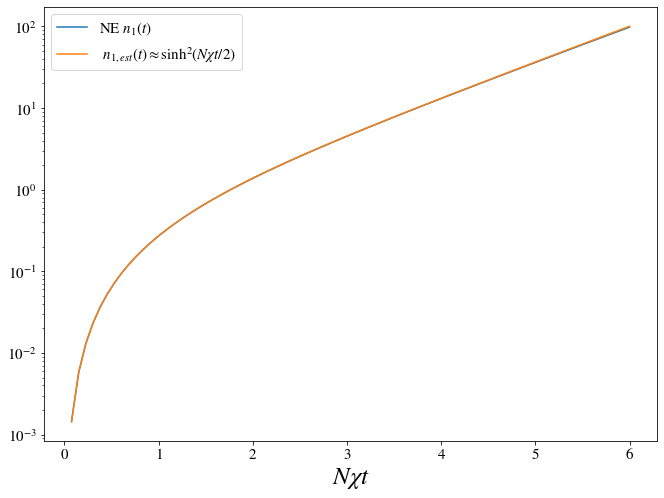

In [232]:
t_index=1


#plt.plot(Nat*tspan*chi,ResultHS[:,H_index1(0,0)])
plt.plot(Nat*tspan[t_index:]*chi,ResultHS[t_index:,H_index1(1,1)],label="NE $n_1(t)$")
plt.plot(Nat*tspan[t_index:]*chi,np.sinh(Nat*tspan[t_index:]*chi/2)**2,label=" $n_{1,est}(t) \\approx \sinh^{2}(N\chi t/2)$")
#plt.plot(Nat*tspan*chi,ResultHS[:,H_index1(2,2)])
#plt.plot(Nat*tspan*chi,ResultHS[:,H_index1(3,3)])
plt.xlabel("$N\chi t$",fontsize=25)
plt.yscale("log")

plt.legend()

In [233]:
Vplus =(V1-V2-V3+V4-(E_X+E_Y)**2)/(Nat/4)
Vminus=(V1+V2+V3+V4-(E_X+E_Y)**2)/(Nat/4)

In [234]:
np.min([Vplus,Vminus])

(0.008738737034436781-2.0182780243133964e-17j)

## Taylor Expansion of the dephasing terms

Consider the hamiltonian of the form $\hat{H}_{i}=\chi\left(\hat{S}_{20}-\hat{S}_{31}\right)\left(\hat{S}_{02}-\hat{S}_{13}\right)+\frac{N\chi}{4}\left(\hat{S}_{00}-\hat{S}_{22}\right)-\frac{N\chi}{4}\left(\hat{S}_{11}-\hat{S}_{33}\right)$, in order to introduce the possible "improvements" to the squeezing term we consider the most general dephasing term in the hamiltonian studied which can be written as:

$$\hat{H}_{{\rm up}}=\chi\left(\hat{S}_{20}-\hat{S}_{31}\right)\left(\hat{S}_{02}-\hat{S}_{13}\right)+\delta_{{\rm A}}\left(t\right)\left(\hat{S}_{00}-\hat{S}_{22}\right)+\delta_{{\rm B}}\left(t\right)\left(\hat{S}_{11}-\hat{S}_{33}\right)$$

Here we consider a Taylor expansion of the terms $\delta_{\rm{A/B}}(t)=\sum_i f_{A/B,i}t^i$. We define two objective functions related with the squeezing direction. The first relates with the fact that we want to get fast squeezing and the second one that we want to have as much squeezing as possible, so in terms of the graph this is simply:


In [ ]:
fontsize=22

plt.title("Numerical Exact Dynamics of the Normalized Variances of $\hat{S}_1^x\pm \hat{S}_2^y$",fontsize=24)

plt.plot(Nat*tspan*chi, Vplus,color='b' ,label="Var($ \hat{S}_1^x + \hat{S}_2^y  $)" )

plt.xlabel("$N\chi t$",fontsize=22)
plt.ylabel("Var$(\hat{O})/(N/4)$",fontsize=22)

plt.yscale("log")

plt.xlim((Nat*chi*tspan[0],Nat*chi*tspan[-1]))
plt.ylim((np.real(np.min(Vplus))*0.2,1.5*np.real(np.max(Vplus))))


index_min = np.argmin(Vplus)


x = [Nat*chi*tspan[index_min]]
y = [np.real(np.min(Vplus))]
plt.plot(x, y, marker="o", markersize=8, markeredgecolor="red", markerfacecolor="red")



plt.text(Nat*chi*tspan[index_min], np.real(np.min(Vplus)*0.5), r"$(N\chi t_{min},\xi^2_{min})$",
        color="black", fontsize=24,
        horizontalalignment="center", verticalalignment="center")

plt.legend(fontsize=22)

We characterize our problem via the following minimization formulation:

\begin{align*}
{\rm min} & \,\,\,\xi^{2}\left(t\right),\\
{\rm S.T.} & \,\,\,\partial_{t}\hat{\rho}=-{\rm i}\left[\hat{H},\hat{\rho}\right],\\
 & \,\,\,\hat{\rho}\left(0\right)={\otimes_{i}\left(\frac{\left|0\right\rangle \left\langle 0\right|_{i}+\left|3\right\rangle \left\langle 3\right|_{i}}{2}\right)},\\
 & \,\,\,\hat{H}=\chi\left(\hat{S}_{20}-\hat{S}_{31}\right)\left(\hat{S}_{02}-\hat{S}_{13}\right)+\delta_{{\rm A}}\left(t\right)\left(\hat{S}_{00}-\hat{S}_{22}\right)+\delta_{{\rm B}}\left(t\right)\left(\hat{S}_{11}-\hat{S}_{33}\right),\\
 & \,\,\,\delta_{{\rm A/B}}\left(t\right)=\sum_{j}f_{{\rm A/B},j}\left(t\right)t^{j},\\
 & \,\,\,S_{abcdef}\approx S_{abcd}S_{ef}+S_{cdef}S_{ab}+S_{abef}S_{cd}-2S_{ab}S_{cd}S_{ef}.
\end{align*}